# Optimization in Continuous Space

In the previous tutorials, we performed Bayesian optimization by discretizing the feature space.
PHYSBO can also optimize continuous quantities directly.

PHYSBO uses [ODAT-SE](https://github.com/issp-center-dev/ODAT-SE) as a library for maximizing acquisition functions in continuous space.
It can be installed using `pip`.

``` bash
python3 -m pip install odatse
```

## Basic Usage

First, we import the necessary modules.

In [1]:
import numpy as np
import physbo
import matplotlib.pyplot as plt

For the function `simulator` to be optimized, while the discrete version takes the candidate point number `action` as input, the continuous version takes the coordinate `x` directly as input.
`x` is an $N\times D$ array, where $N$ is the number of data points to calculate and $D$ is the dimension of the feature space.

In [2]:
def simulator(x):
    return -np.sum(x**2, axis=1)

The lower and upper bounds of the feature space are specified by `min_X` and `max_X`, respectively.

In [3]:
min_X = [-2.0, -2.0]
max_X = [2.0, 2.0]

The continuous version of the `Policy` class is `physbo.search.range.Policy`.
The constructor takes `min_X` and `max_X` as arguments.
Like the discrete version, `mpi4py.MPI.Comm` can be passed to `comm` to enable parallel execution.
The random seed can also be set using the `set_seed` method.

In [4]:
seed = 31415
policy = physbo.search.range.Policy(min_X=min_X, max_X=max_X)
policy.set_seed(seed)

Once the `Policy` class is created, optimization can be performed in the same way as the discrete version. First, we execute `random_search` to create initial training data for learning the surrogate model.

In [5]:
policy.random_search(max_num_probes=10, simulator=simulator)

0001-th step: f(x) = -0.831185 (action=[0.58327442 0.70069668])
   current best f(x) = -0.831185 (best action=[0.58327442 0.70069668]) 

0002-th step: f(x) = -5.914186 (action=[1.88281594 1.53921746])
   current best f(x) = -0.831185 (best action=[0.58327442 0.70069668]) 

0003-th step: f(x) = -4.352756 (action=[1.63626337 1.29437187])
   current best f(x) = -0.831185 (best action=[0.58327442 0.70069668]) 

0004-th step: f(x) = -0.237057 (action=[-0.05316112  0.48397432])
   current best f(x) = -0.237057 (best action=[-0.05316112  0.48397432]) 

0005-th step: f(x) = -0.488353 (action=[ 0.57404985 -0.39852174])
   current best f(x) = -0.237057 (best action=[-0.05316112  0.48397432]) 

0006-th step: f(x) = -2.441356 (action=[1.50087645 0.43442582])
   current best f(x) = -0.237057 (best action=[-0.05316112  0.48397432]) 

0007-th step: f(x) = -3.440784 (action=[-1.57320004 -0.98276443])
   current best f(x) = -0.237057 (best action=[-0.05316112  0.48397432]) 

0008-th step: f(x) = -3.452

Next, we execute Bayesian optimization using `bayes_search`.

In [6]:
res = policy.bayes_search(max_num_probes=10, simulator=simulator, score="EI")

Start the initial hyper parameter searching ...
Done

Start the hyper parameter learning ...
0 -th epoch marginal likelihood 14.586042968393606
50 -th epoch marginal likelihood 14.234874815492592
100 -th epoch marginal likelihood 14.063504009485214
150 -th epoch marginal likelihood 13.916750623078872
200 -th epoch marginal likelihood 13.772691286779512
250 -th epoch marginal likelihood 13.633003306706115
300 -th epoch marginal likelihood 13.49920085405347
350 -th epoch marginal likelihood 13.371932369305052
400 -th epoch marginal likelihood 13.251396114620242
450 -th epoch marginal likelihood 13.13755169992651
500 -th epoch marginal likelihood 13.03022856247339
Done

0011-th step: f(x) = -5.026362 (action=[-1.03592362  1.98827161])
   current best f(x) = -0.237057 (best action=[-0.05316112  0.48397432]) 

0012-th step: f(x) = -0.028634 (action=[0.1327553  0.10492853])
   current best f(x) = -0.028634 (best action=[0.1327553  0.10492853]) 

0013-th step: f(x) = -0.013414 (action=[0.0703

The optimization process of ODAT-SE at each step is output to standard output. Note that ODAT-SE is a library that performs minimization, unlike PHYSBO, so the acquisition function is multiplied by -1 to make it a minimization problem.
The return value `res` of the `bayes_search` function stores the Bayesian optimization process. The optimization results at each step can be obtained using the `export_sequence_best_fx` method.

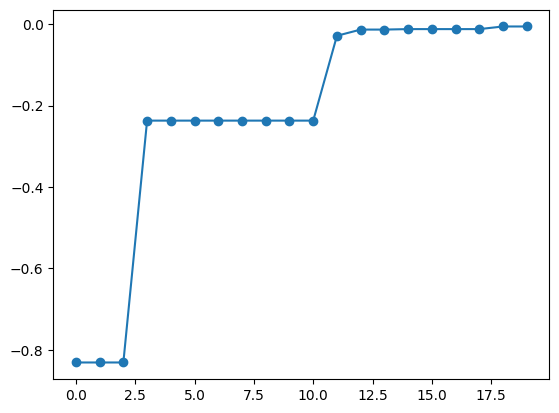

In [7]:
best_fx, best_X = res.export_sequence_best_fx()

plt.plot(best_fx, "o-")

## Optimization of Acquisition Function

ODAT-SE is used for optimizing the acquisition function. By default, grid search is used for optimization. The optimization method can be specified with the `alg_name` keyword:

- "exchange": Replica Exchange Monte Carlo method
- "pamc": Population Annealing Monte Carlo method
- "minsearch": Nelder-Mead method
- "mapper": Grid search
- "bayes": Bayesian optimization

For example, to perform optimization using the Replica Exchange Monte Carlo method:

In [8]:
policy = physbo.search.range.Policy(min_X=min_X, max_X=max_X)
policy.set_seed(seed)
policy.random_search(max_num_probes=10, simulator=simulator)
res = policy.bayes_search(max_num_probes=10, simulator=simulator, alg_name="exchange", score="EI")

best_fx, best_X = res.export_sequence_best_fx()

plt.plot(best_fx, "o-")

0001-th step: f(x) = -0.831185 (action=[0.58327442 0.70069668])
   current best f(x) = -0.831185 (best action=[0.58327442 0.70069668]) 

0002-th step: f(x) = -5.914186 (action=[1.88281594 1.53921746])
   current best f(x) = -0.831185 (best action=[0.58327442 0.70069668]) 

0003-th step: f(x) = -4.352756 (action=[1.63626337 1.29437187])
   current best f(x) = -0.831185 (best action=[0.58327442 0.70069668]) 

0004-th step: f(x) = -0.237057 (action=[-0.05316112  0.48397432])
   current best f(x) = -0.237057 (best action=[-0.05316112  0.48397432]) 

0005-th step: f(x) = -0.488353 (action=[ 0.57404985 -0.39852174])
   current best f(x) = -0.237057 (best action=[-0.05316112  0.48397432]) 

0006-th step: f(x) = -2.441356 (action=[1.50087645 0.43442582])
   current best f(x) = -0.237057 (best action=[-0.05316112  0.48397432]) 

0007-th step: f(x) = -3.440784 (action=[-1.57320004 -0.98276443])
   current best f(x) = -0.237057 (best action=[-0.05316112  0.48397432]) 

0008-th step: f(x) = -3.452

TypeError: bayes_search() got an unexpected keyword argument 'alg_name'

Default hyperparameters are used for each method, such as the temperature used in the Replica Exchange Monte Carlo method. To change these parameters, pass a dictionary variable `alg_dict` to the `bayes_search` function. This is used as the `[algorithm]` section in the [ODAT-SE input file](https://issp-center-dev.github.io/ODAT-SE/manual/main/ja/input.html).

The `physbo.search.odatse.default_alg_dict` function can be used to get the default parameters in PHYSBO for each optimization method. Modifying this is the easiest way to change parameters.
For example, if you want to set the minimum temperature `Tmin` to half of its default value in the Replica Exchange Monte Carlo method:

0001-th step: f(x) = -0.831185 (action=[0.58327442 0.70069668])
   current best f(x) = -0.831185 (best action=[0.58327442 0.70069668]) 

0002-th step: f(x) = -5.914186 (action=[1.88281594 1.53921746])
   current best f(x) = -0.831185 (best action=[0.58327442 0.70069668]) 

0003-th step: f(x) = -4.352756 (action=[1.63626337 1.29437187])
   current best f(x) = -0.831185 (best action=[0.58327442 0.70069668]) 

0004-th step: f(x) = -0.237057 (action=[-0.05316112  0.48397432])
   current best f(x) = -0.237057 (best action=[-0.05316112  0.48397432]) 

0005-th step: f(x) = -0.488353 (action=[ 0.57404985 -0.39852174])
   current best f(x) = -0.237057 (best action=[-0.05316112  0.48397432]) 

0006-th step: f(x) = -2.441356 (action=[1.50087645 0.43442582])
   current best f(x) = -0.237057 (best action=[-0.05316112  0.48397432]) 

0007-th step: f(x) = -3.440784 (action=[-1.57320004 -0.98276443])
   current best f(x) = -0.237057 (best action=[-0.05316112  0.48397432]) 

0008-th step: f(x) = -3.452

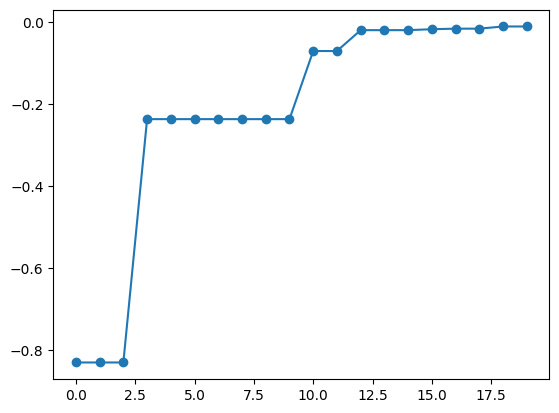

In [ ]:
alg_dict = physbo.search.odatse.default_alg_dict(min_X, max_X, "exchange")
alg_dict["exchange"]["Tmin"] *= 0.5

policy = physbo.search.range.Policy(min_X=min_X, max_X=max_X)
policy.set_seed(seed)

policy.random_search(max_num_probes=10, simulator=simulator)
res = policy.bayes_search(max_num_probes=10, simulator=simulator, score="EI", alg_dict=alg_dict)

best_fx, best_X = res.export_sequence_best_fx()

plt.plot(best_fx, "o-")